In [ ]:
import pypsa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

%matplotlib inline
plt.rc("figure", figsize=(8, 8))

In [2]:
network = pypsa.examples.ac_dc_meshed(from_master=True) 

INFO:pypsa.io:Imported network ac-dc-meshed.nc has buses, carriers, generators, global_constraints, lines, links, loads


In [151]:
network.generators.to_csv(r"C:\Users\Asus\Downloads\ali.csv")

In [143]:
network.loads_t.p_set 


Load,London,Norwich,Frankfurt,Bremen,Norway,Manchester
snapshot,,,,,,
2015-01-01 00:00:00,35.796244,415.462564,398.047847,640.086378,820.035836,857.551440
2015-01-01 01:00:00,976.824561,262.606146,432.436106,703.554334,854.834047,750.599624
2015-01-01 02:00:00,250.587312,418.476353,379.803928,440.836130,42.550744,156.564876
2015-01-01 03:00:00,130.753145,552.959539,868.361764,612.576306,647.548233,527.870822
2015-01-01 04:00:00,151.100169,218.159858,548.770755,803.436781,884.073873,83.897759
2015-01-01 05:00:00,931.857052,791.976266,828.665243,605.400687,509.062449,676.623319
2015-01-01 06:00:00,289.848287,531.870681,449.290752,641.090590,595.607965,731.137100
2015-01-01 07:00:00,864.343322,23.513467,699.163766,408.008541,291.642450,553.344889
2015-01-01 08:00:00,689.577264,970.059068,915.866780,912.247776,2.153493,298.338082


In [7]:
reduced_form = pd.DataFrame()

array([<Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>], dtype=object)

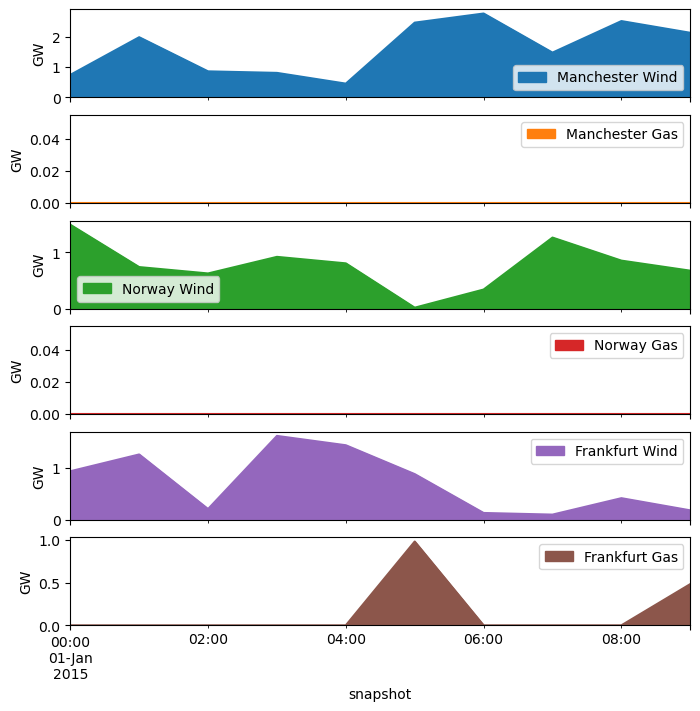

In [28]:
network.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )


AttributeError: PolyCollection.set() got an unexpected keyword argument 'ylabel'

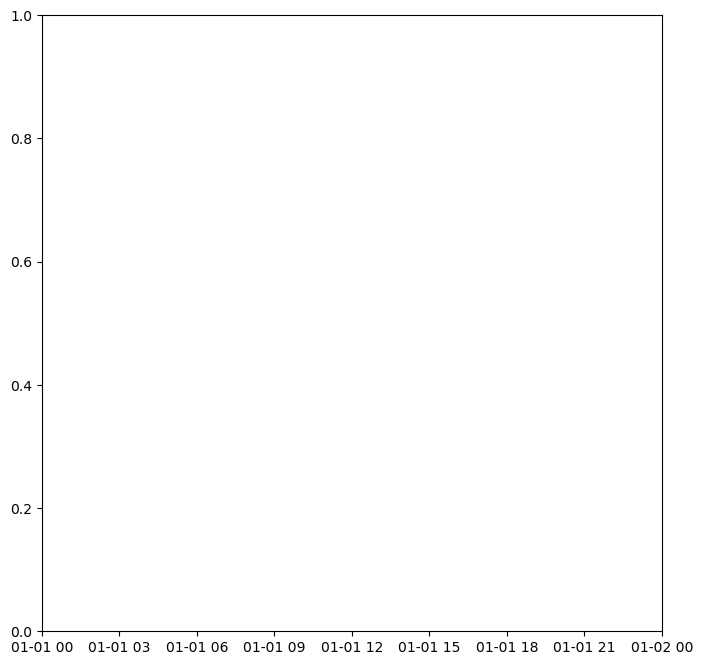

In [41]:
network.generators_t.p
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.ylabel= "GW"
ax.stackplot(network.generators_t.p.index, network.generators_t.p["Frankfurt Wind"], network.generators_t.p["Frankfurt Gas"]  )


<h1 style="color:red;font-size:40pt;font-weight:700" >Task2 PLots</h1>

<h1 style="color:white;font-size:20pt;font-weight:700" >Frankfurt Stack PLot</h1>

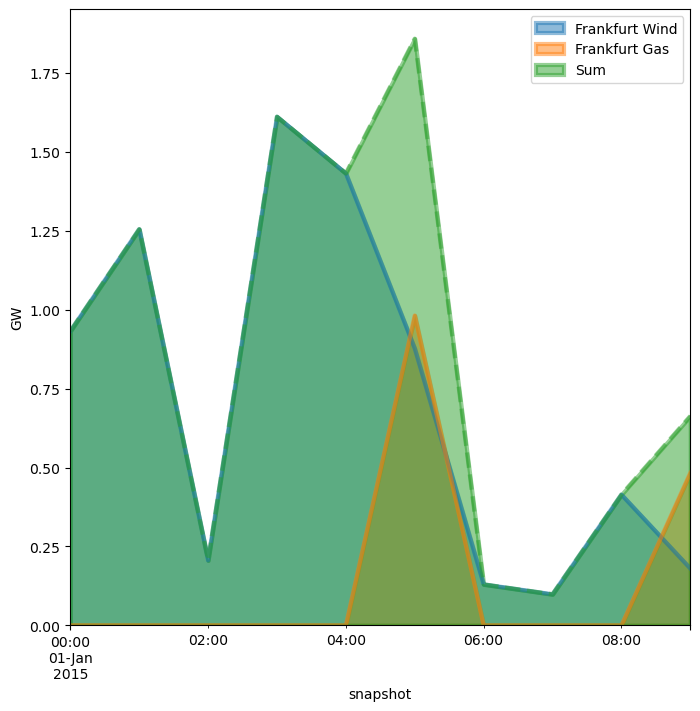

In [83]:
df = pd.DataFrame(data={"Frankfurt Wind":network.generators_t.p["Frankfurt Wind"] ,"Frankfurt Gas": network.generators_t.p["Frankfurt Gas"]  ,
     "Sum":network.generators_t.p["Frankfurt Wind"] + network.generators_t.p["Frankfurt Gas"]}).div(1e3)

ax = df.plot.area(stacked=False ,ylabel="GW",style=["-","-","--"]  ,linewidth=3 , figsize=(8,8))

<h1 style="color:white;font-size:20pt;font-weight:700" >Norway Stack PLot</h1>

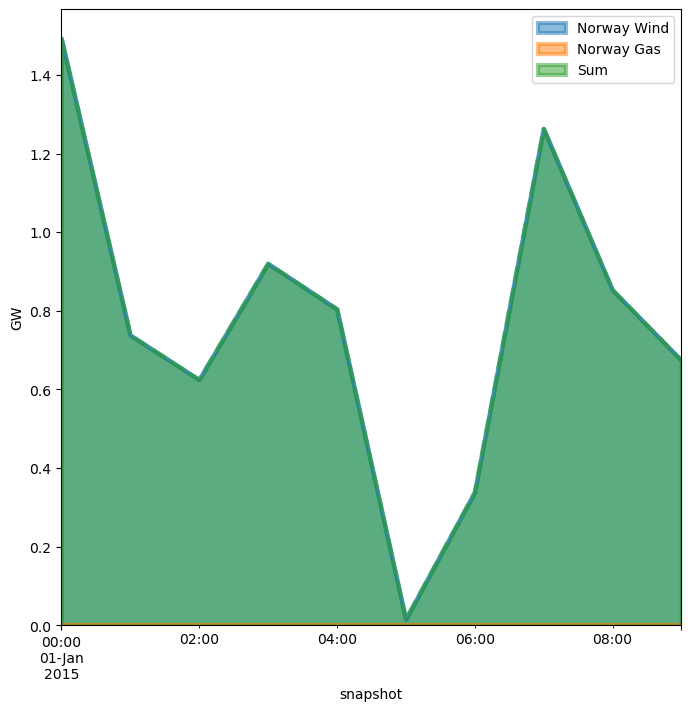

In [115]:
df = pd.DataFrame(data={"Norway Wind":network.generators_t.p["Norway Wind"] ,"Norway Gas": network.generators_t.p["Norway Gas"]  ,
     "Sum":network.generators_t.p["Norway Wind"] + network.generators_t.p["Norway Gas"]}).div(1e3)

ax = df.plot.area(stacked=False ,ylabel="GW",style=["-","-","--"]  ,linewidth=3 , figsize=(8,8))

<h1 style="color:white;font-size:20pt;font-weight:700" >Manchester Stack PLot</h1>

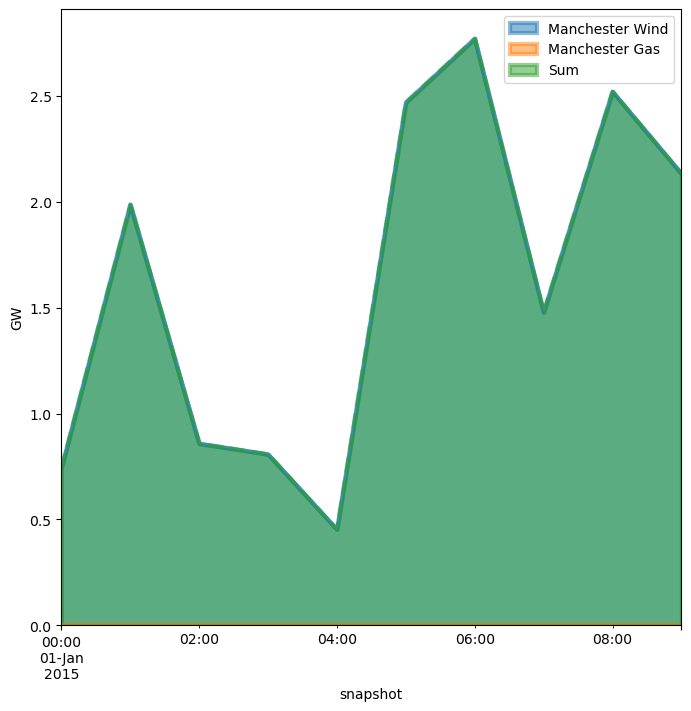

In [116]:
df = pd.DataFrame(data={"Manchester Wind":network.generators_t.p["Manchester Wind"] ,"Manchester Gas": network.generators_t.p["Manchester Gas"]  ,
     "Sum":network.generators_t.p["Manchester Wind"] + network.generators_t.p["Manchester Gas"]}).div(1e3)

ax = df.plot.area(stacked=False ,ylabel="GW",style=["-","-","--"]  ,linewidth=3 , figsize=(8,8))

In [12]:
network.optimize()

Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.47e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-hg9rm_oy.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-d59q1e5i.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-hg9rm_oy.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.210828068e+07 inf =   1.864e-11 (0) 1
*   239: obj =  -3.474256041e+06 inf =   1.755e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

In [21]:
network.snapshot_weightings

,objective,generators,stores
snapshot,,,
2015-01-01 00:00:00,1.0,1.0,1.0
2015-01-01 01:00:00,1.0,1.0,1.0
2015-01-01 02:00:00,1.0,1.0,1.0
2015-01-01 03:00:00,1.0,1.0,1.0
2015-01-01 04:00:00,1.0,1.0,1.0
2015-01-01 05:00:00,1.0,1.0,1.0
2015-01-01 06:00:00,1.0,1.0,1.0
2015-01-01 07:00:00,1.0,1.0,1.0
2015-01-01 08:00:00,1.0,1.0,1.0


In [154]:
network.generators_t.p_max_pu

Generator,Manchester Wind,Frankfurt Wind,Norway Wind
snapshot,,,
2015-01-01 00:00:00,0.930020,0.559078,0.974583
2015-01-01 01:00:00,0.485748,0.752910,0.481290
2015-01-01 02:00:00,0.233692,0.123465,0.407226
2015-01-01 03:00:00,0.257604,0.966677,0.599965
2015-01-01 04:00:00,0.626906,0.859008,0.524468
2015-01-01 05:00:00,0.603598,0.526154,0.009693
2015-01-01 06:00:00,0.678908,0.077893,0.220453
2015-01-01 07:00:00,0.361303,0.059023,0.823919
2015-01-01 08:00:00,0.621604,0.248554,0.556230


In [159]:
network.loads_t.p

Load,London,Frankfurt,Norway,Norwich,Bremen,Manchester
snapshot,,,,,,
2015-01-01 00:00:00,35.796244,398.047847,820.035836,415.462564,640.086378,857.551440
2015-01-01 01:00:00,976.824561,432.436106,854.834047,262.606146,703.554334,750.599624
2015-01-01 02:00:00,250.587312,379.803928,42.550744,418.476353,440.836130,156.564876
2015-01-01 03:00:00,130.753145,868.361764,647.548233,552.959539,612.576306,527.870822
2015-01-01 04:00:00,151.100169,548.770755,884.073873,218.159858,803.436781,83.897759
2015-01-01 05:00:00,931.857052,828.665243,509.062449,791.976266,605.400687,676.623319
2015-01-01 06:00:00,289.848287,449.290752,595.607965,531.870681,641.090590,731.137100
2015-01-01 07:00:00,864.343322,699.163766,291.642450,23.513467,408.008541,553.344889
2015-01-01 08:00:00,689.577264,915.866780,2.153493,970.059068,912.247776,298.338082


In [160]:
network.loads_t.p_set

Load,London,Norwich,Frankfurt,Bremen,Norway,Manchester
snapshot,,,,,,
2015-01-01 00:00:00,35.796244,415.462564,398.047847,640.086378,820.035836,857.551440
2015-01-01 01:00:00,976.824561,262.606146,432.436106,703.554334,854.834047,750.599624
2015-01-01 02:00:00,250.587312,418.476353,379.803928,440.836130,42.550744,156.564876
2015-01-01 03:00:00,130.753145,552.959539,868.361764,612.576306,647.548233,527.870822
2015-01-01 04:00:00,151.100169,218.159858,548.770755,803.436781,884.073873,83.897759
2015-01-01 05:00:00,931.857052,791.976266,828.665243,605.400687,509.062449,676.623319
2015-01-01 06:00:00,289.848287,531.870681,449.290752,641.090590,595.607965,731.137100
2015-01-01 07:00:00,864.343322,23.513467,699.163766,408.008541,291.642450,553.344889
2015-01-01 08:00:00,689.577264,970.059068,915.866780,912.247776,2.153493,298.338082


In [161]:
network.optimize(solver_name="glpk")

Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.47e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-1x_ctysl.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-cilcdy0f.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-1x_ctysl.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.210828068e+07 inf =   1.864e-11 (0) 1
*   239: obj =  -3.474256041e+06 inf =   1.755e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

Generator,Manchester Wind,Manchester Gas,Norway Wind,Norway Gas,Frankfurt Wind,Frankfurt Gas
snapshot,,,,,,
2015-01-01 00:00:00,0.741983,0.0,1.492610,0.0,0.932389,0.000000
2015-01-01 01:00:00,1.987100,0.0,0.738107,0.0,1.255650,0.000000
2015-01-01 02:00:00,0.858392,0.0,0.624521,0.0,0.205906,0.000000
2015-01-01 03:00:00,0.807813,0.0,0.920106,0.0,1.612150,0.000000
2015-01-01 04:00:00,0.452527,0.0,0.804324,0.0,1.432590,0.000000
2015-01-01 05:00:00,2.469210,0.0,0.014865,0.0,0.877480,0.982034
2015-01-01 06:00:00,2.770850,0.0,0.338087,0.0,0.129904,0.000000
2015-01-01 07:00:00,1.478020,0.0,1.263560,0.0,0.098435,0.000000
2015-01-01 08:00:00,2.520690,0.0,0.853034,0.0,0.414520,0.000000


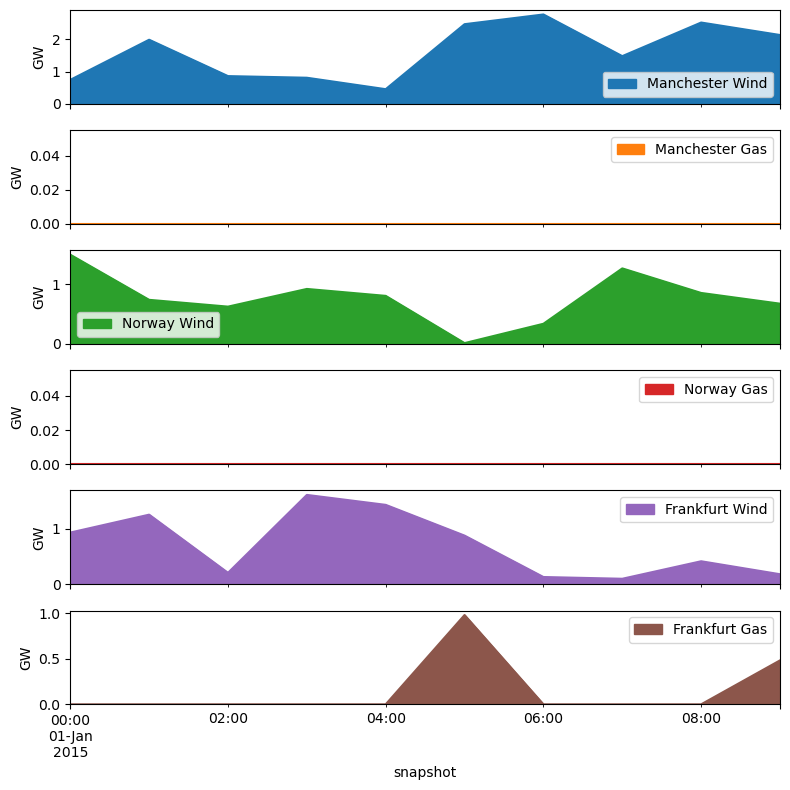

In [231]:
network.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )
plt.tight_layout()
network.generators_t.p.div(1e3)

In [170]:

network.generators

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4090.810
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1533.600
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1667.720
Frankfurt Gas,Frankfurt,102.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,982.034


In [171]:
network.buses_t.marginal_price

Bus,London,Norwich,Norwich DC,Manchester,Bremen,Bremen DC,Frankfurt,Norway,Norway DC
snapshot,,,,,,,,,
2015-01-01 00:00:00,0.110000,0.110000,0.110000,0.11,0.103370,0.103370,0.103370,0.090000,0.090000
2015-01-01 01:00:00,1421.940000,1421.930000,1421.930000,1421.93,1421.930000,1421.930000,1421.930000,1421.930000,1421.930000
2015-01-01 02:00:00,0.110000,0.110000,0.110000,0.11,0.110000,0.110000,0.110000,0.110000,0.110000
2015-01-01 03:00:00,0.110000,0.110000,0.110000,0.11,0.110000,0.110000,0.110000,0.110000,0.110000
2015-01-01 04:00:00,0.110000,0.110000,0.110000,0.11,0.110000,0.110000,0.110000,0.110000,0.110000
2015-01-01 05:00:00,1593.570000,1593.570000,1593.570000,1593.57,1593.570000,1593.570000,1593.370000,1593.570000,1593.570000
2015-01-01 06:00:00,0.110000,0.110000,0.343333,0.11,0.350371,0.350371,0.350371,0.347073,0.347073
2015-01-01 07:00:00,1007.090000,1007.090000,1007.090000,1007.09,1007.070000,1007.070000,1007.070000,1006.810000,1007.040000
2015-01-01 08:00:00,0.244916,0.244376,0.244376,0.11,0.467259,0.256148,0.467259,0.217457,0.217457


In [172]:
network.buses_t.marginal_price.mean(1)

snapshot
2015-01-01 00:00:00       0.103346
2015-01-01 01:00:00    1421.931111
2015-01-01 02:00:00       0.110000
2015-01-01 03:00:00       0.110000
2015-01-01 04:00:00       0.110000
2015-01-01 05:00:00    1593.547778
2015-01-01 06:00:00       0.268732
2015-01-01 07:00:00    1007.046667
2015-01-01 08:00:00       0.274361
2015-01-01 09:00:00    1490.700000
dtype: float64

In [184]:
network2 = network.copy()

In [185]:
network2.generators

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4090.810
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1533.600
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1667.720
Frankfurt Gas,Frankfurt,102.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,982.034


In [186]:
network2.generators.capital_cost.iloc[2] += 1000.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\2689560908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network2.generators.capital_cost.iloc[2] += 1000.0


In [187]:
network2.generators.capital_cost

Generator
Manchester Wind    2793.651603
Manchester Gas      196.615168
Norway Wind        3184.374796
Norway Gas          158.251250
Frankfurt Wind     2129.456122
Frankfurt Gas       102.676953
Name: capital_cost, dtype: float64

In [188]:
network2.optimize(solver_name="glpk")

Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.3s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -2.63e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-an_9993c.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-dvqa92u7.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-an_9993c.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.977092151e+07 inf =   1.864e-11 (0) 1
*   257: obj =  -2.625239179e+06 inf =   6.859e-13 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

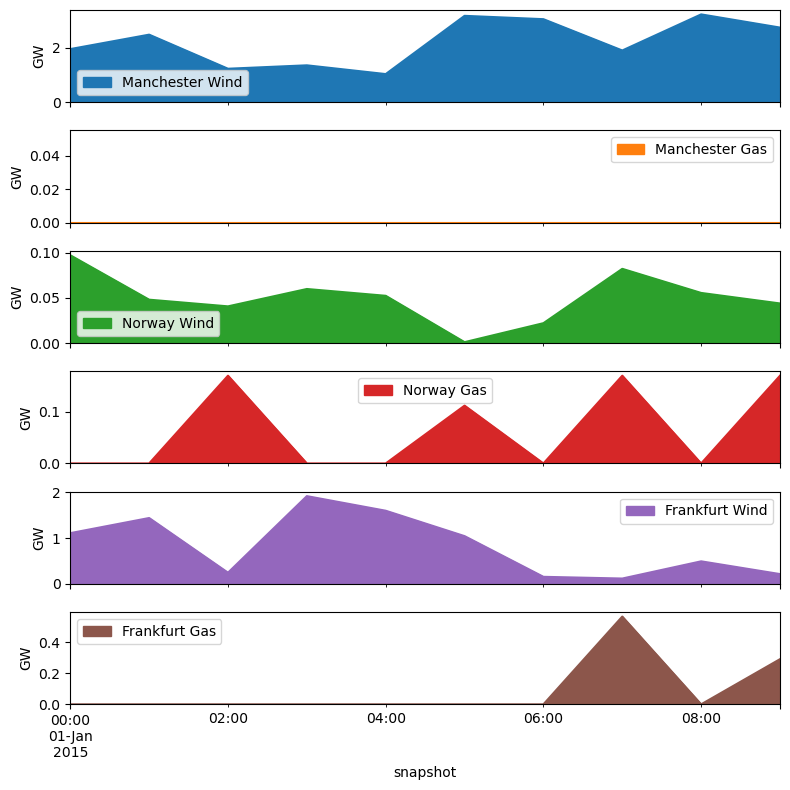

In [189]:
network2.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )
plt.tight_layout()

<h1  style="color:red;font-size:40pt;font-weight:700"> Simulation of Task 3 - Last Part </h1>

In [232]:
import numpy as np

# The number we deduce from Norway Wind 

In [239]:
data_norway_gas_frankfurt_wind = []
for _ in np.linspace(0,1000,10):
    network_test = network.copy()
    network_test.generators.capital_cost.iloc[2] -= _
    network_test.optimize(solver_name="glpk")
    data_norway_gas_frankfurt_wind.append(network_test.generators_t.p[["Norway Wind","Frankfurt Gas"]])


C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.33s


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-xztj7zd5.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-8hgy0h36.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-xztj7zd5.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.210828068e+07 inf =   1.864e-11 (0) 1
*   239: obj =  -3.474256041e+06 inf =   1.755e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.47e+06
Solver model: not available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.69s


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-fz4tc44t.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-d7jkjym4.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-fz4tc44t.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.125687614e+07 inf =   1.864e-11 (0) 1
*   233: obj =  -3.633544914e+06 inf =   1.583e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.63e+06
Solver model: not available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.28s
INFO:linopy.con

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-ljqrhq7g.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-sxxl68r1.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-ljqrhq7g.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.040547160e+07 inf =   1.864e-11 (0) 1
*   243: obj =  -3.792833787e+06 inf =   3.306e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.5s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.95e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-s8i1m10k.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-l17khiu7.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-s8i1m10k.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   9.554067064e+06 inf =   1.864e-11 (0) 1
*   243: obj =  -3.952122660e+06 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.38s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.11e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-jdya1f6e.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-cq2432da.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-jdya1f6e.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   8.702662527e+06 inf =   1.864e-11 (0) 1
*   240: obj =  -4.111411533e+06 inf =   1.068e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.29s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.27e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-shu7iejg.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-mbrw7dcs.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-shu7iejg.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   7.851257990e+06 inf =   1.864e-11 (0) 1
*   244: obj =  -4.270700406e+06 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.26s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.43e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-why1hpgh.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-sh7_3tpj.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-why1hpgh.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   6.999853453e+06 inf =   1.864e-11 (0) 1
*   244: obj =  -4.429989279e+06 inf =   5.667e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.60e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-y2vewmag.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-oyir5mj7.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-y2vewmag.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   6.148448915e+06 inf =   1.864e-11 (0) 1
*   242: obj =  -4.597878882e+06 inf =   2.637e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.91e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-dwe3cvye.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-yexs329p.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-dwe3cvye.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   5.297044378e+06 inf =   1.864e-11 (0) 1
*   241: obj =  -4.913814725e+06 inf =   2.637e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -5.23e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-xjirgjua.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-ly23xyry.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-xjirgjua.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   4.445639841e+06 inf =   1.864e-11 (0) 1
*   245: obj =  -5.229750567e+06 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


As you see, when decreasing Norway Wind capital cost about 600-700 the switch from Frankfurt Gas to Norway Wind is occurred

In [241]:
data_norway_gas_frankfurt_wind 



[Generator            Norway Wind  Frankfurt Gas
 snapshot                                       
 2015-01-01 00:00:00    1492.6100          0.000
 2015-01-01 01:00:00     738.1070          0.000
 2015-01-01 02:00:00     624.5210          0.000
 2015-01-01 03:00:00     920.1060          0.000
 2015-01-01 04:00:00     804.3240          0.000
 2015-01-01 05:00:00      14.8647        982.034
 2015-01-01 06:00:00     338.0870          0.000
 2015-01-01 07:00:00    1263.5600          0.000
 2015-01-01 08:00:00     853.0340          0.000
 2015-01-01 09:00:00     673.8880        483.240,
 Generator            Norway Wind  Frankfurt Gas
 snapshot                                       
 2015-01-01 00:00:00    1492.6100          0.000
 2015-01-01 01:00:00     738.1070          0.000
 2015-01-01 02:00:00     624.5210          0.000
 2015-01-01 03:00:00     920.1060          0.000
 2015-01-01 04:00:00     804.3240          0.000
 2015-01-01 05:00:00      14.8647        982.034
 2015-01-01 06:00:0

<h1  style="color:red;font-size:40pt;font-weight:700"> From here to end, you see some simulation that are showing the effect of changing Norway Wind and Frankfurt Gas capital cost effect on optimal solution  </h1>

<h1  style="color:white;font-size:20pt;font-weight:700"> Decreasing Norway Wind capital cost </h1>

In [190]:
network3 = network.copy()


In [191]:
network3.generators


,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4090.810
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1533.600
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1667.720
Frankfurt Gas,Frankfurt,102.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,982.034


In [195]:
network3.generators.capital_cost.iloc[2] -= 1000.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\1028021462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network3.generators.capital_cost.iloc[2] -= 1000.0


In [196]:
network3.generators.capital_cost

Generator
Manchester Wind    2793.651603
Manchester Gas      196.615168
Norway Wind        1184.374796
Norway Gas          158.251250
Frankfurt Wind     2129.456122
Frankfurt Gas       102.676953
Name: capital_cost, dtype: float64

In [197]:
network3.optimize(solver_name="glpk")

Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.3s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -5.23e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-h8gmeted.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-uudc420r.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-h8gmeted.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   4.445639841e+06 inf =   1.864e-11 (0) 1
*   245: obj =  -5.229750567e+06 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

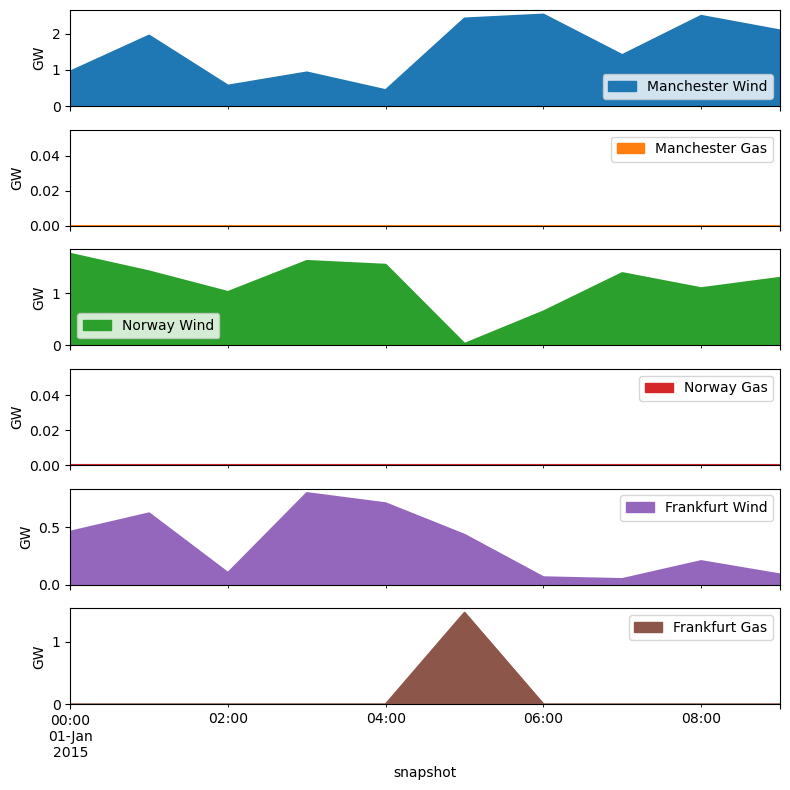

In [198]:
network3.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )
plt.tight_layout()

In [238]:
network3.generators_t.p[["Norway Wind","Frankfurt Gas"]]

Generator,Norway Wind,Frankfurt Gas
snapshot,,
2015-01-01 00:00:00,1753.2700,0.00
2015-01-01 01:00:00,1416.6400,0.00
2015-01-01 02:00:00,1022.4000,0.00
2015-01-01 03:00:00,1616.5100,0.00
2015-01-01 04:00:00,1543.7300,0.00
2015-01-01 05:00:00,28.5297,1465.27
2015-01-01 06:00:00,648.8870,0.00
2015-01-01 07:00:00,1384.0300,0.00
2015-01-01 08:00:00,1094.5500,0.00


<h1  style="color:white;font-size:20pt;font-weight:700"> Decreasing Frankfurt Gas capital cost </h1>

In [217]:
network4 = network.copy()

In [219]:
network4.generators.capital_cost.iloc[5] -= 40.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\3353419686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network4.generators.capital_cost.iloc[5] -= 40.0


In [220]:
network4.generators

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4090.810
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1533.600
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1667.720
Frankfurt Gas,Frankfurt,62.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,982.034


In [221]:
network4.optimize(solver_name="glpk")


Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.14e+05
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-_l1lagib.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-m9y_izjw.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-_l1lagib.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -1.784321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.530828068e+07 inf =   1.864e-11 (0) 1
*   239: obj =  -3.135374199e+05 inf =   1.755e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

Generator,Manchester Wind,Manchester Gas,Norway Wind,Norway Gas,Frankfurt Wind,Frankfurt Gas
snapshot,,,,,,
2015-01-01 00:00:00,0.741983,0.0,1.492610,0.0,0.932389,0.000000
2015-01-01 01:00:00,1.987100,0.0,0.738107,0.0,1.255650,0.000000
2015-01-01 02:00:00,0.858392,0.0,0.624521,0.0,0.205906,0.000000
2015-01-01 03:00:00,0.807813,0.0,0.920106,0.0,1.612150,0.000000
2015-01-01 04:00:00,0.452527,0.0,0.804324,0.0,1.432590,0.000000
2015-01-01 05:00:00,2.469210,0.0,0.014865,0.0,0.877480,0.982034
2015-01-01 06:00:00,2.770850,0.0,0.338087,0.0,0.129904,0.000000
2015-01-01 07:00:00,1.478020,0.0,1.263560,0.0,0.098435,0.000000
2015-01-01 08:00:00,2.520690,0.0,0.853034,0.0,0.414520,0.000000


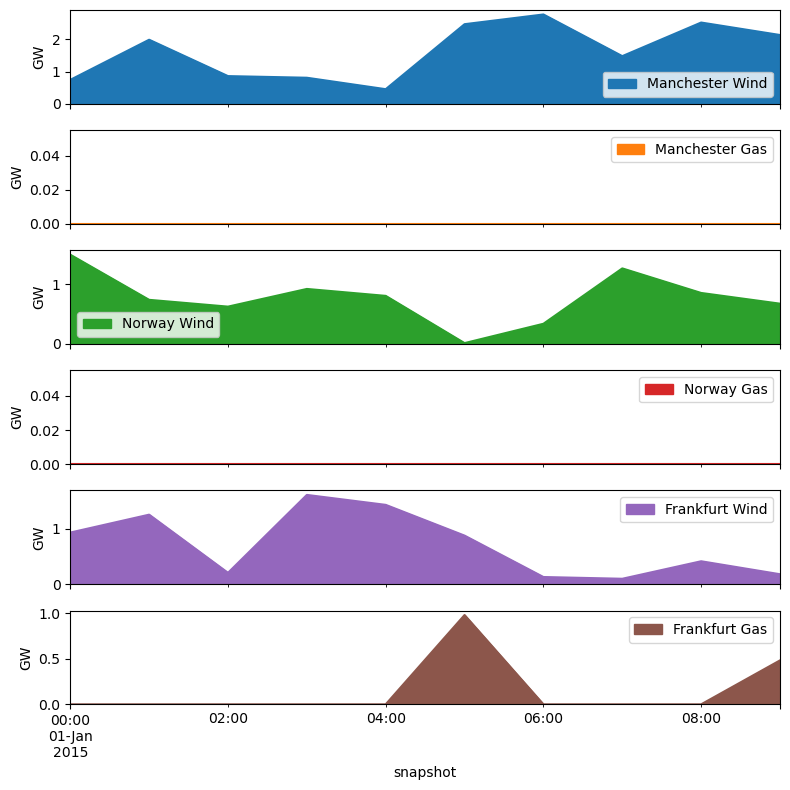

In [230]:
network4.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )
plt.tight_layout()
network4.generators_t.p.div(1e3)

<h1  style="color:white;font-size:20pt;font-weight:700"> Increasing Frankfurt Gas capital cost </h1>

In [224]:
network5 = network.copy()

In [226]:
network5.generators.capital_cost.iloc[5] += 200.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4102679053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network5.generators.capital_cost.iloc[5] += 200.0


In [227]:
network5.generators

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4090.810
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1533.600
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1667.720
Frankfurt Gas,Frankfurt,302.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,982.034


In [228]:
network5.optimize(solver_name="glpk")


Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -1.94e+07
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-mxf98_6p.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-jzx42dw8.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-mxf98_6p.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -3.704321118e+07 inf =   9.486e+04 (101)
    162: obj =  -3.891719324e+06 inf =   1.864e-11 (0) 1
*   238: obj =  -1.944798213e+07 inf =   7.092e-13 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

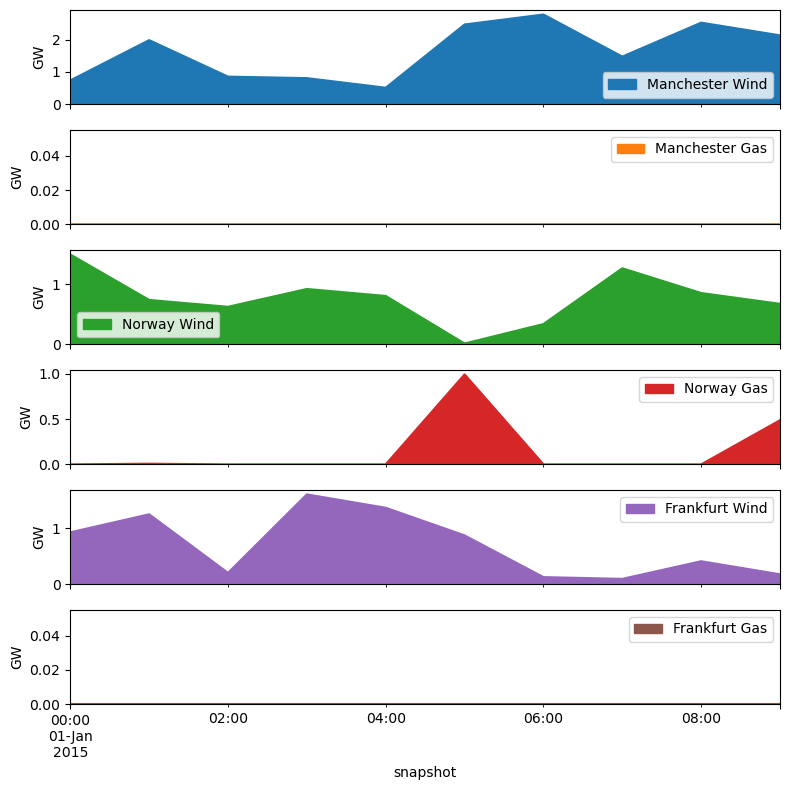

In [229]:
network5.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )
plt.tight_layout()